# Weather Data Automation and Analysis

This notebook documents the steps taken to automate weather data collection and management using Bash scripting, as well as analyzing the collected data using Python and pandas. Each task is explained with the corresponding commands and their roles.

---

## Task 1: Create Directory Structure
To organize the project, we need to create a directory structure. The following command creates a data directory at the root of the repository with two subdirectories: timestamps and weather.

`mkdir -p ./data/timestamps ./data/weather`

Explanation
`mkdir -p`: Creates directories recursively. If they already exist, no error is thrown.
This ensures that the project has a structured format for storing timestamps and weather data.

## Task 2: Timestamps

Navigate to the data/timestamps directory and append the current date and time to a file named now.txt. Repeat this step ten times.

`cd data/timestamps`
`date >> now.txt`

Explanation
`date`: Outputs the current date and time.
`>> now.txt`: Appends the output to `now.txt` without overwriting existing content.
After appending timestamps ten times, verify the content of `now.txt` using:

`more now.txt`

## Task 3: Formatting Timestamps
To format timestamps in `YYYYmmdd_HHMMSS` format, use the following command and append it to a file named formatted.txt.

`'date +"%Y%m%d_%H%M%S"' >> formatted.txt`

Explanation
`date +"%Y%m%d_%H%M%S"`: Formats the date as `YYYYmmdd_HHMMSS`.
This ensures timestamps are in a consistent format, which is useful for naming files or sorting data.

## Task 4: Create Timestamped Files
Create an empty file with a name based on the current timestamp in `YYYYmmdd_HHMMSS.txt` format.

`touch 'date +"%Y%m%d_%H%M%S".txt'`

Explanation
`touch 'date +"%Y%m%d_%H%M%S".txt'`: Executes the date command within backticks to generate a timestamp and creates an empty file with that name.
This step demonstrates how to dynamically name files using timestamps.

## Task 5: Download Today's Weather Data
Navigate to the `data/weather` directory and download weather data for Athenry from Met Éireann using wget. Save it as `weather.json`.

`cd ../weather`
`wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today`

Explanation
`wget`: Downloads files from a specified URL.
`-O weather.json`: Saves the downloaded file as `weather.json`.

## Task 6: Timestamp the Data
Modify the previous command to save the downloaded file with a timestamped name in `YYYYmmdd_HHMMSS.json` format.

`wget -O 'date +"%Y%m%d_%H%M%S"'.json https://prodapi.metweb.ie/observations/athenry/today`

Explanation
`-O 'date +"%Y%m%d_%H%M%S"'.json`: Embeds a formatted timestamp in the filename, ensuring each downloaded file has a unique name.

## Task 7: Write the Script
Automate Task 6 by writing a Bash script (`weather.sh`) that downloads weather data, manages old files, and updates timestamps. Below is the script:

#### Weather.sh

----


## Weather Dataset Explanation

The weather data file contains observations from Met Éireann's Athenry weather station. The dataset includes real-time weather information such as temperature, humidity, wind speed, and other meteorological parameters. 

### Key Fields in the Dataset:
- **Temperature**: The current temperature in degrees Celsius.
- **Humidity**: The percentage of moisture in the air.
- **Wind Speed**: The speed of wind measured in meters per second or kilometers per hour.
- **Wind Direction**: The direction from which the wind is blowing, typically given in degrees.
- **Pressure**: Atmospheric pressure measured in hPa (hectopascals).
- **Rainfall**: The amount of precipitation recorded, usually measured in millimeters.

This data provides valuable insights into current weather conditions and can be used for analysis, forecasting, or research purposes.

## Import Libraries


In [281]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Load Weather Data

Use the pandas.read_json() function to load one of the weather data files. Replace <filename> with the actual name of one of your JSON files (e.g., 20241206_220000_athenry.json):

In [282]:
# Load the JSON file into a pandas DataFrame
file_directory = r".\data\weather"

# Get the list of files in the directory
files = os.listdir(file_directory)

# Filter out only JSON files
json_files = [f for f in files if f.endswith('.json')]

# Get the newest file based on the timestamp in the filename
newest_file = max(json_files, key=lambda x: os.path.getctime(os.path.join(file_directory, x)))

# Load the JSON file into a pandas DataFrame
file_name = newest_file
weather_data = pd.read_json(os.path.join(file_directory, file_name))

# Display the first few rows of the data
weather_data.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,1,02n,Fair,"""Fair""",9,-,NE,45,89,0,1042,Tuesday,2024-10-12,00:00
1,Athenry,1,04n,Cloudy,"""Cloudy""",7,-,NE,45,87,0,1042,Tuesday,2024-10-12,01:00
2,Athenry,2,02n,Fair,"""Fair""",15,-,E,90,87,0,1041,Tuesday,2024-10-12,02:00
3,Athenry,-1,02n,Fair,"""Fair""",2,-,NW,315,92,0,1041,Tuesday,2024-10-12,03:00
4,Athenry,-3,02n,Fair,"""Fair""",2,-,S,180,93,0,1041,Tuesday,2024-10-12,04:00


## Examine and Summarize the Data

Use pandas functions to examine and summarize the last download weather dataset:

In [283]:
# Display the basic information about the dataset in a table format
info_table = pd.DataFrame({
    'Column': weather_data.columns,
    'Non-Null Count': weather_data.count().values,
    'Dtype': weather_data.dtypes.values
})
info_table

,Column,Non-Null Count,Dtype
0,name,20,object
1,temperature,20,int64
2,symbol,20,object
3,weatherDescription,20,object
4,text,20,object
5,windSpeed,20,int64
6,windGust,20,object
7,cardinalWindDirection,20,object
8,windDirection,20,int64
9,humidity,20,int64


In [284]:
# Display summary statistics for numerical columns
weather_data.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20
mean,0.650000,6.150000,58.500000,88.950000,0.0,1040.300000,2024-10-12 00:00:00
min,-5.000000,2.000000,0.000000,80.000000,0.0,1039.000000,2024-10-12 00:00:00
25%,-3.000000,4.000000,45.000000,84.000000,0.0,1039.000000,2024-10-12 00:00:00
50%,1.500000,6.000000,45.000000,88.000000,0.0,1040.500000,2024-10-12 00:00:00
75%,4.000000,7.000000,45.000000,94.000000,0.0,1041.000000,2024-10-12 00:00:00
max,5.000000,15.000000,315.000000,97.000000,0.0,1042.000000,2024-10-12 00:00:00
std,3.453069,3.183427,71.673602,5.500957,0.0,1.031095,NaN


### Temperature Over Time

***

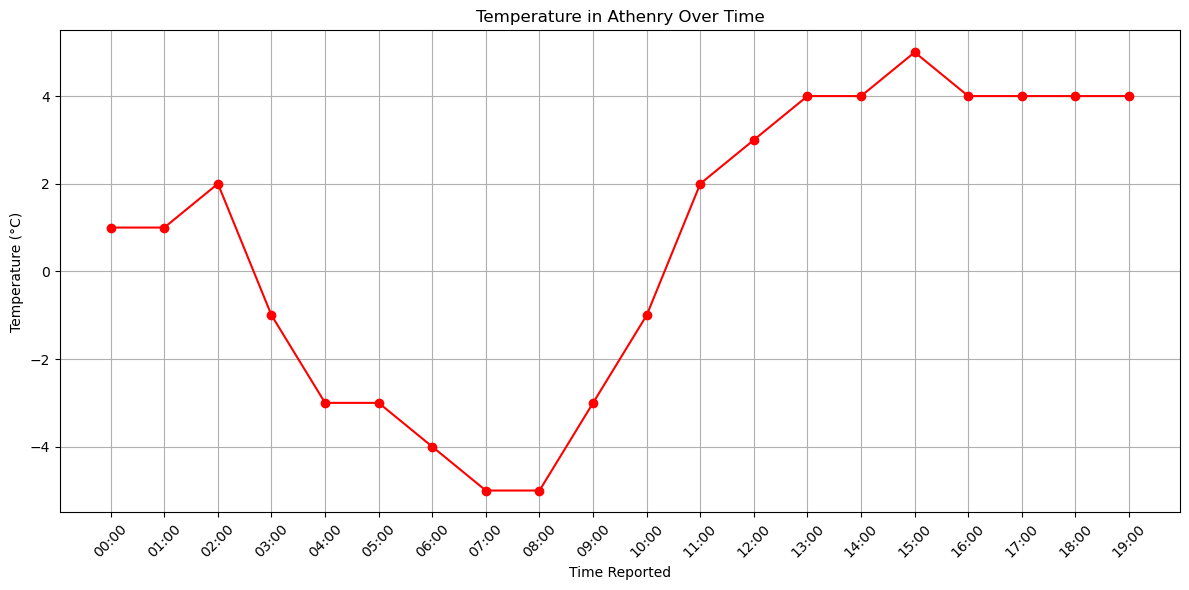

In [291]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['reportTime'], weather_data['temperature'], marker='o', color='red')
plt.title('Temperature in Athenry Over Time')
plt.xlabel('Time Reported')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Humidity Over Time

***

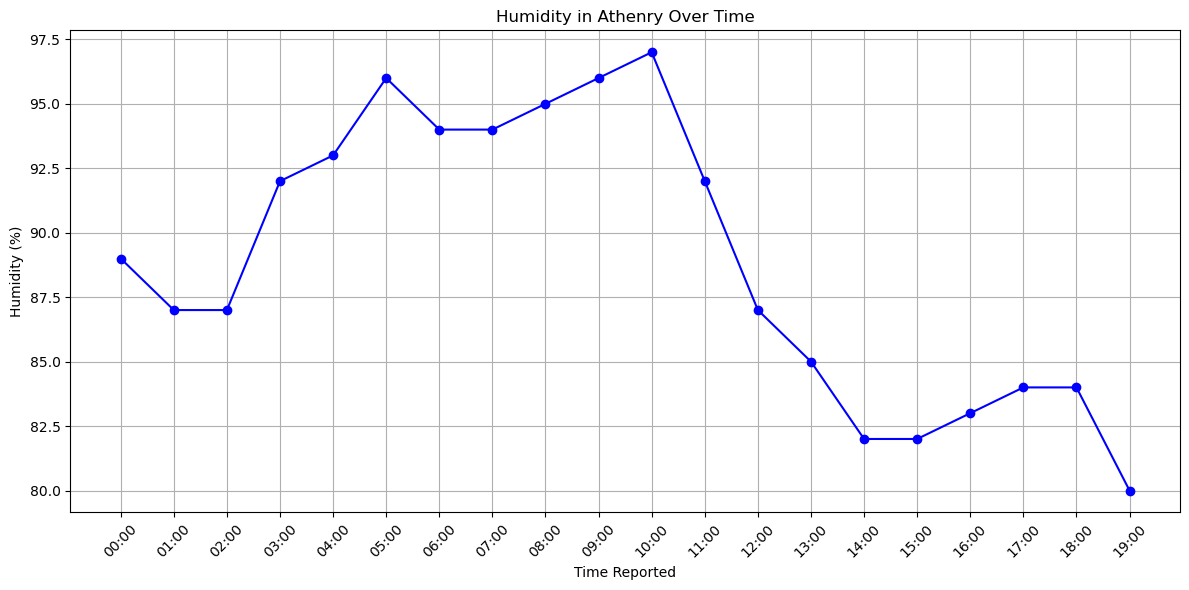

In [286]:
# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['reportTime'], weather_data['humidity'], marker='o', color='blue')
plt.title('Humidity in Athenry Over Time')
plt.xlabel('Time Reported')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Wind Speed Over Time

***

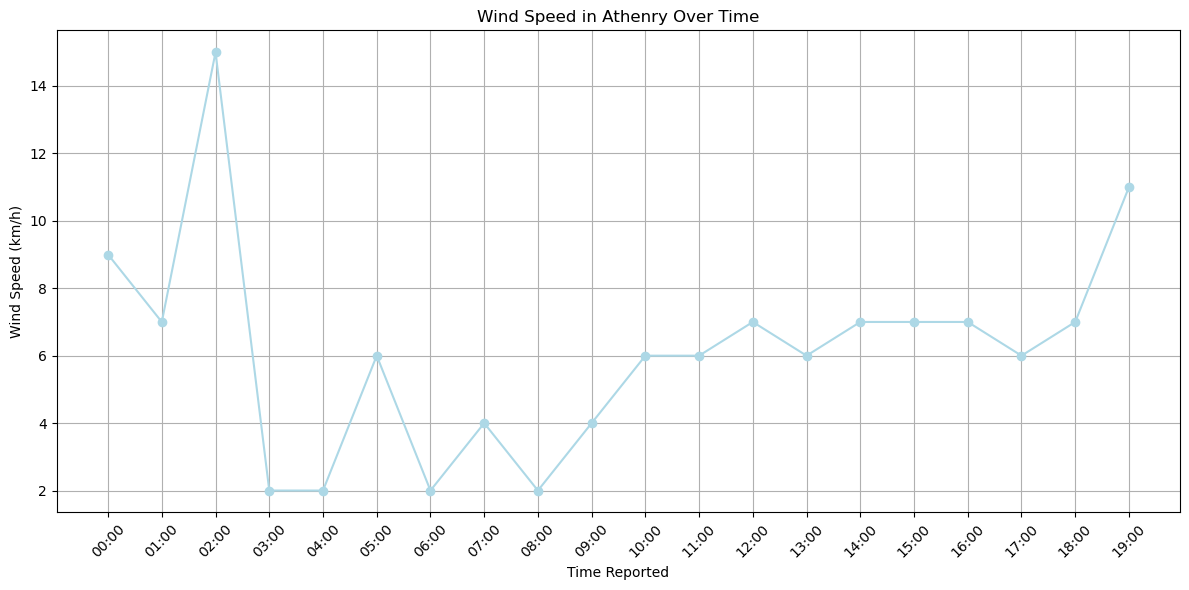

In [287]:
# Plot wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['reportTime'], weather_data['windSpeed'], marker='o', color='lightblue')
plt.title('Wind Speed in Athenry Over Time')
plt.xlabel('Time Reported')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Wind Direction Over Time

***

C:\Users\caina\AppData\Local\Temp\ipykernel_240744\2643957381.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(weather_data_with_new_row['reportTime'][1:]), verticalalignment='top', fontsize=7)


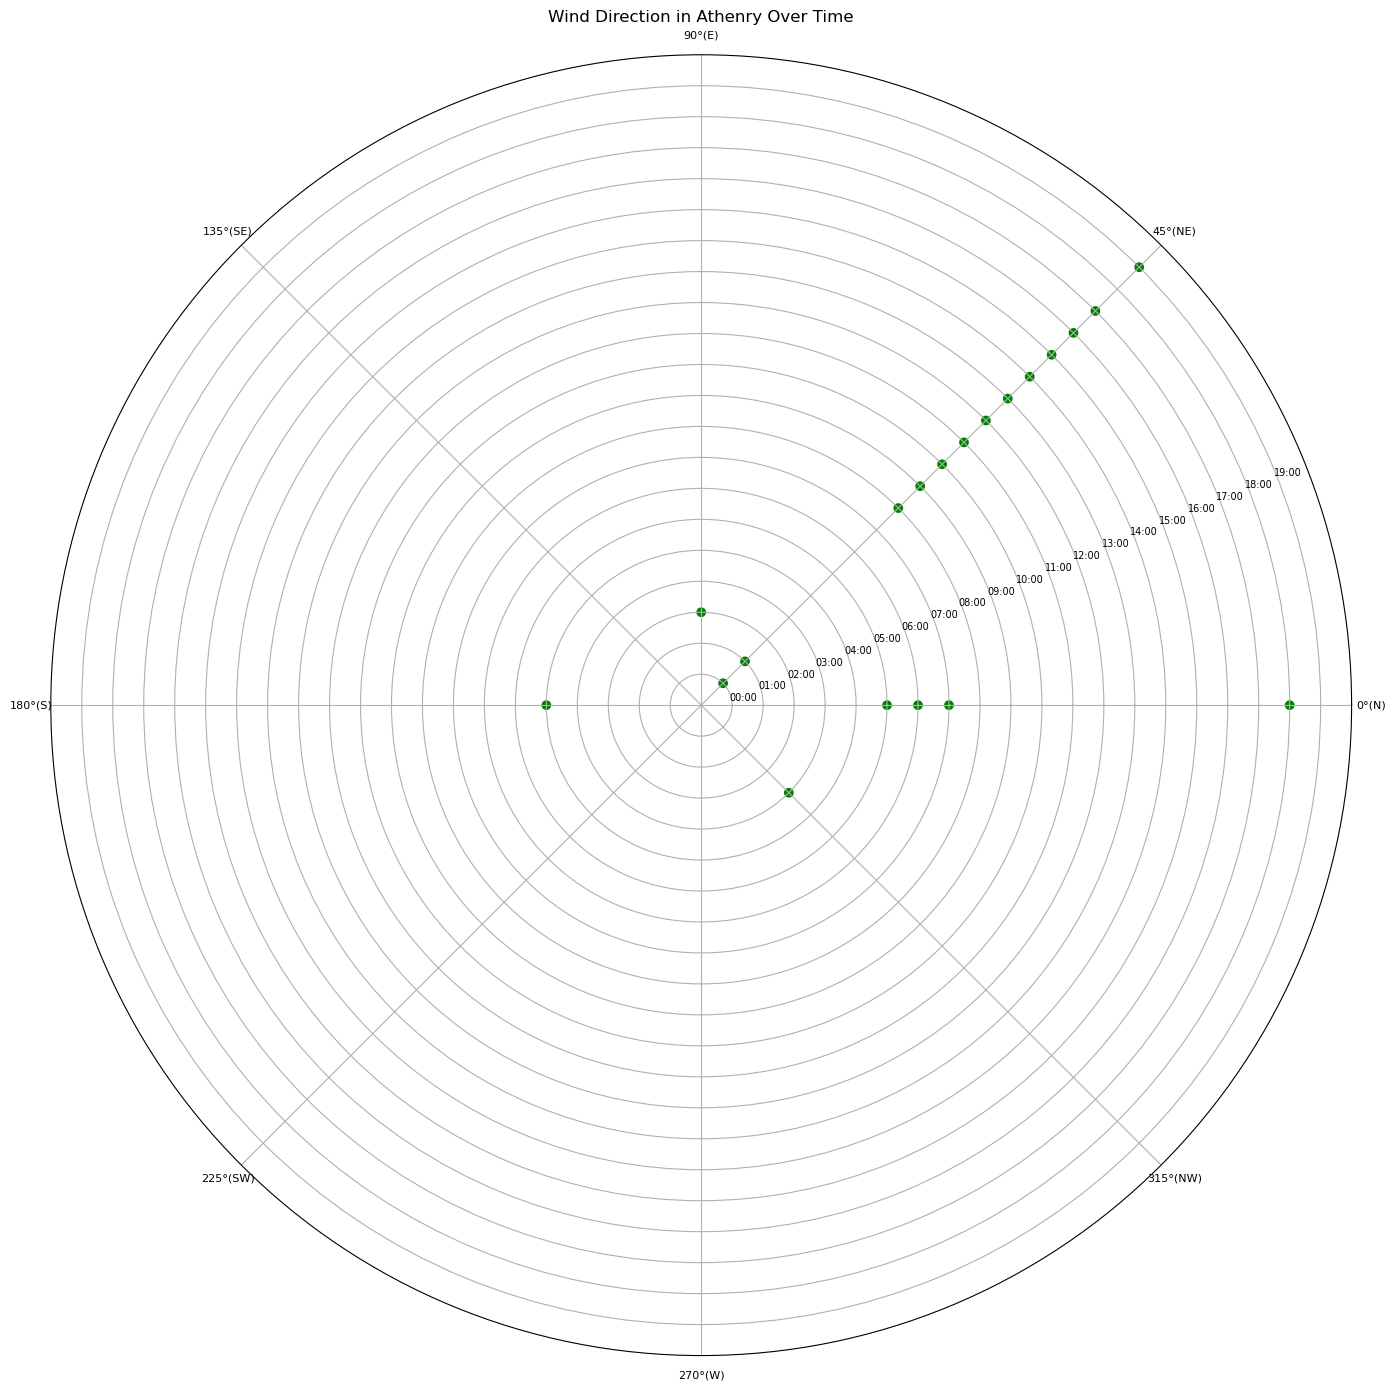

In [288]:
# Create a new row with values copied from the first row of weather_data
new_row = weather_data.iloc[0]

# Concatenate the new row with the existing DataFrame
weather_data_with_new_row = pd.concat([pd.DataFrame([new_row]), weather_data], ignore_index=True)
# Subtract 1 hour from the first value of the 'reportTime' column
weather_data_with_new_row.at[0, 'reportTime'] = (pd.to_datetime(weather_data_with_new_row.at[0, 'reportTime']) - pd.Timedelta(hours=1)).strftime('%H:%M')

# Convert wind direction from degrees to radians
wind_direction_radians = np.deg2rad(weather_data_with_new_row['windDirection'])

# Create a list of colors with the first value set to transparent
colors = ['green'] * len(wind_direction_radians)
colors[0] = (0, 0, 0, 0)  # RGBA for transparent

# Plot a scatterplot on polar axis with wind direction over time
plt.figure(figsize=(18, 14))
ax = plt.subplot(111, polar=True)
scatter = ax.scatter(wind_direction_radians, weather_data_with_new_row['reportTime'], marker='o', color=colors)
plt.title('Wind Direction in Athenry Over Time')

# Set custom labels for degrees
degree_labels = ['0°(N)', '45°(NE)', '90°(E)', '135°(SE)', '180°(S)', '225°(SW)', '270°(W)', '315°(NW)']
ax.set_xticks(np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(degree_labels, fontsize=8)

# Make the first label of reportTime invisible
ax.set_yticklabels([''] + list(weather_data_with_new_row['reportTime'][1:]), verticalalignment='top', fontsize=7)

plt.tight_layout()
plt.show()


### Pressure Over Time

***

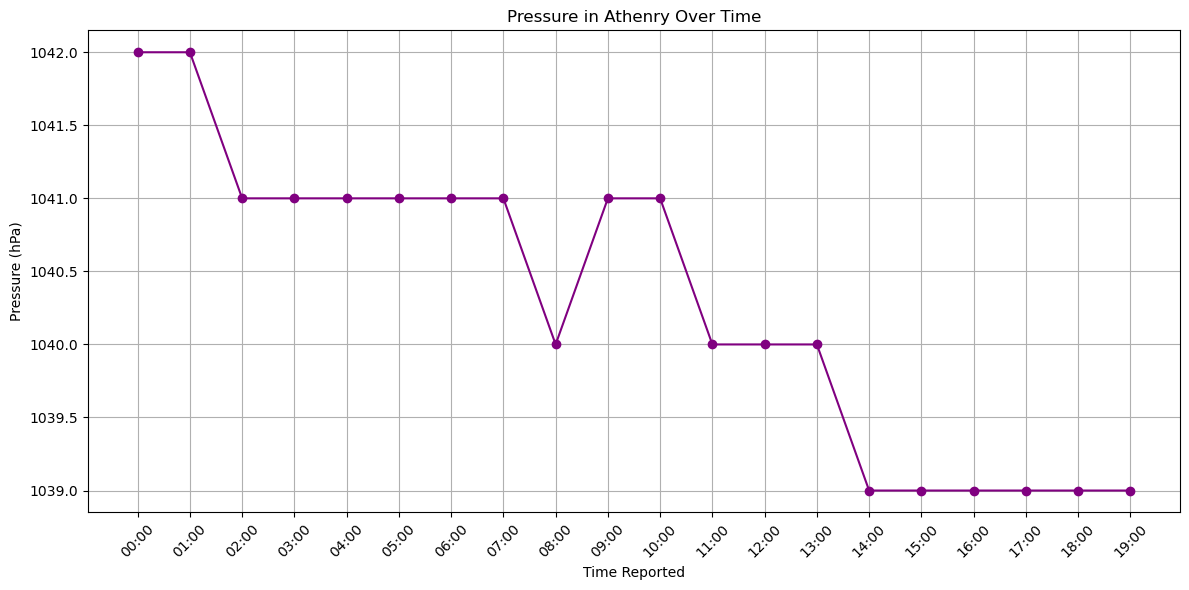

In [289]:
# Plot pressure over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['reportTime'], weather_data['pressure'], marker='o', color='purple')
plt.title('Pressure in Athenry Over Time')
plt.xlabel('Time Reported')
plt.ylabel('Pressure (hPa)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Rainfall Over Time

***

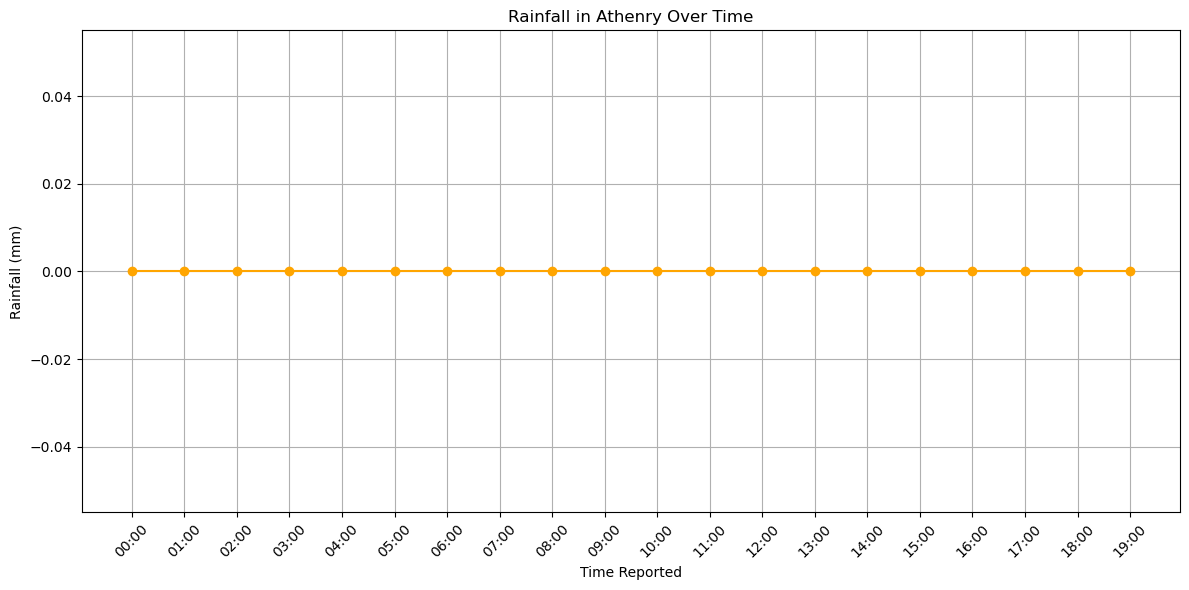

In [290]:
# Plot rainfall over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['reportTime'], weather_data['rainfall'], marker='o', color='orange')
plt.title('Rainfall in Athenry Over Time')
plt.xlabel('Time Reported')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
